# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane treated mice showed much smaller tumor volumes at their final timepoints when compared to mice treated with Infubinol and Ceftamin. 
- In Capomulin treated mice, the average volumes of tumors would increase along with the weight of the mouse.
- Specifically in mouse l509 (who was also treated with Capomulin), major tumor volume reductions would occur between days 20-25 and 30-35. After day 35, there would be a gradual rise in tumor volume until the final timepoint. 

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = r"D:\ClassMaterials\Homework Folders\Challenge 5\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = r"D:\ClassMaterials\Homework Folders\Challenge 5\Starter_Code\Pymaceuticals\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [54]:
# Checking the number of mice.
total_mice = merged_df["Mouse ID"].nunique()
total_mice

249

In [55]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Assisted by Xpert Learning Tool
duplicate_IDs = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_IDs["Mouse ID"].unique()

array(['g989'], dtype=object)

In [56]:
# Optional: Get all the data for the duplicate mouse ID. 


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [58]:
# Checking the number of mice in the clean DataFrame.
unique_clean_mice = clean_df["Mouse ID"].nunique()
unique_clean_mice


248

## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Xpert Learning Tool assisted
summary_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
renamed_summary = summary_stats.rename(columns={"mean": "Mean Tumor Volume", "median": "Median Tumor Volume", "var": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev.", "sem": "Tumor Volume Std. Err."})
renamed_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [60]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [61]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mouse Timepoints for Each Drug Regimen (Pandas)')

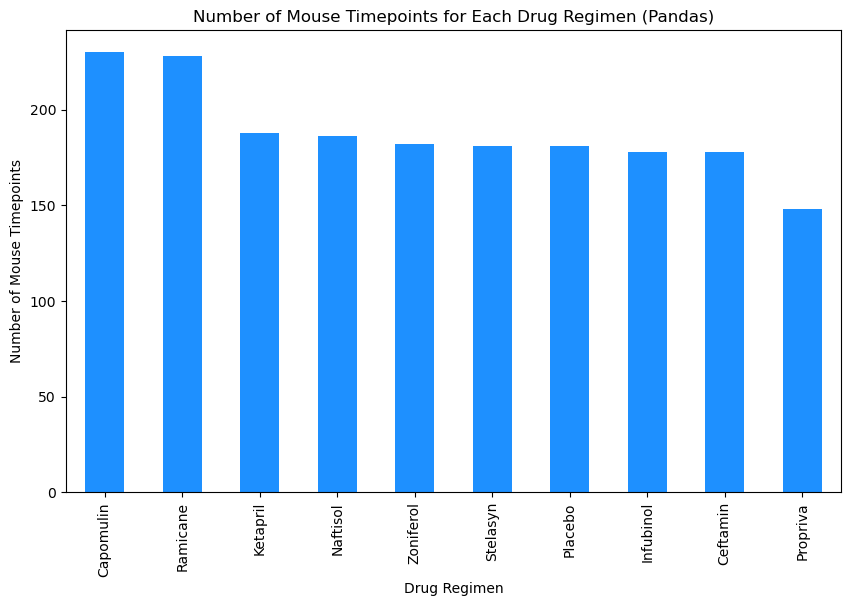

In [62]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
fix, ax = plt.subplots()
ax = clean_df["Drug Regimen"].value_counts().plot(kind="bar", figsize=(10, 6), color="dodgerblue")
ax.set_ylabel("Number of Mouse Timepoints")
ax.set_title("Number of Mouse Timepoints for Each Drug Regimen (Pandas)")



Text(0.5, 1.0, 'Number of Mouse Timepoints for Each Drug Regimen (Matplotlib)')

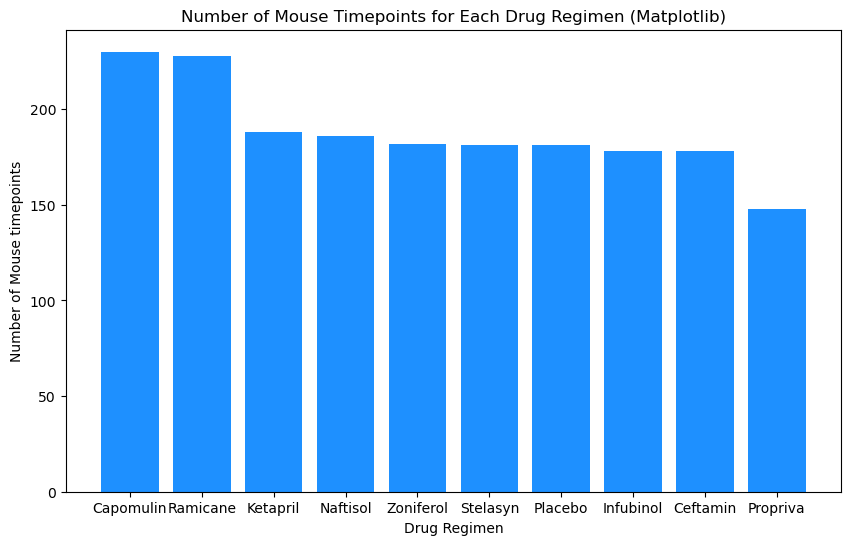

In [63]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_df["Drug Regimen"].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color="dodgerblue")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mouse timepoints")
plt.title("Number of Mouse Timepoints for Each Drug Regimen (Matplotlib)")

Text(0.5, 1.0, 'Distribution of Mice Sex (Pandas)')

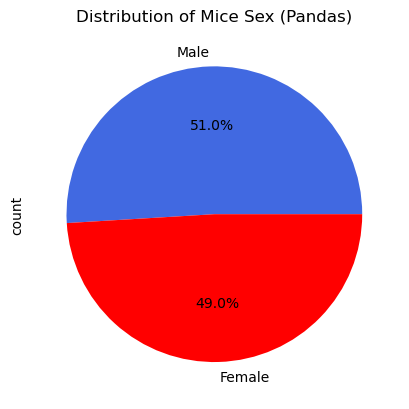

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Xpert Learning Tool assisted
fix, bx = plt.subplots()
piecolors = ["royalblue", "red"]
bx = clean_df["Sex"].value_counts().plot(kind = "pie", autopct="%1.1f%%", colors = piecolors)
bx.set_title('Distribution of Mice Sex (Pandas)')


Text(0.5, 1.0, 'Distribution of Mice Sex (Matplotlib)')

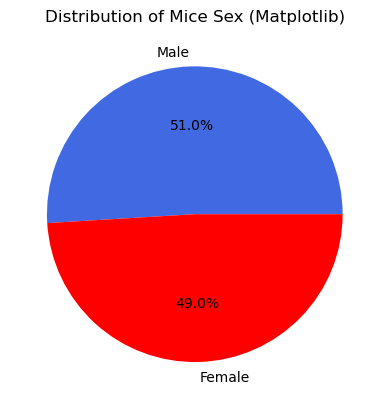

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = clean_df['Sex'].value_counts()
piecolors2 = ["royalblue", "red"]
plt.pie(sex_counts.values, labels=sex_counts.index, autopct="%1.1f%%", colors = piecolors2)
plt.title("Distribution of Mice Sex (Matplotlib)")

## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
# # Xpert Learning Tool assisted
final_times_df = clean_df.groupby("Mouse ID").agg({"Timepoint": "max"})
final_timepoints = final_times_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, final_times_df, on=["Mouse ID", "Timepoint"], how = "inner")
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [67]:
# Put treatments into a list for for loop (and later for plot labels)
volume_data = []

for treatment in treatment_list:
    final_tumor_data = merged_df.loc[merged_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    volume_data.append(final_tumor_data)
# Create empty list to fill with tumor vol data (for plotting)
volume_data

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = final_tumor_data.quantile([0.25, 0.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q
lower_bound = lower_q - (1.5 * iqr)
upper_bound = upper_q + (1.5 * iqr)

# Locate the rows which contain mice on each drug and get the tumor volumes
# # Xpert Learning Tool assisted
final_tumor_volumes = merged_df[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
    
# add subset 
final_tumor_data = final_tumor_volumes["Tumor Volume (mm3)"]
    
# Determine outliers using upper and lower bounds
# Xpert Learning Tool assisted
outliers = final_tumor_volumes[(final_tumor_volumes["Tumor Volume (mm3)"] < lower_bound) | (final_tumor_volumes["Tumor Volume (mm3)"] > upper_bound)]
print(outliers)

    Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
66      k403     Ramicane         45           22.050126
226     s185    Capomulin         45           23.343598


Text(0, 0.5, 'Final Tumor VOlume (mm3)')

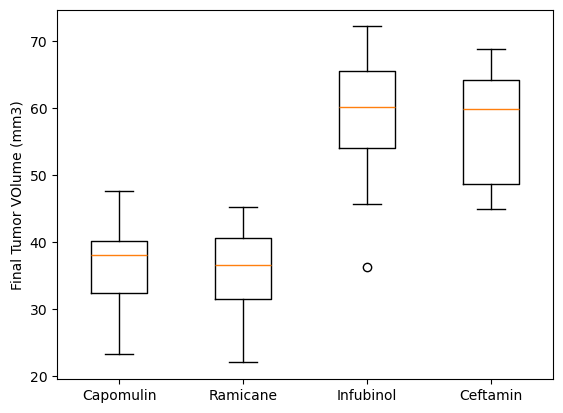

In [68]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group using matplotlib
tumor_group = [merged_df[merged_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"] for treatment in treatment_list]
fig, cx = plt.subplots()
cx.boxplot(tumor_group, labels = treatment_list)
plt.ylabel("Final Tumor VOlume (mm3)")


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse l509')

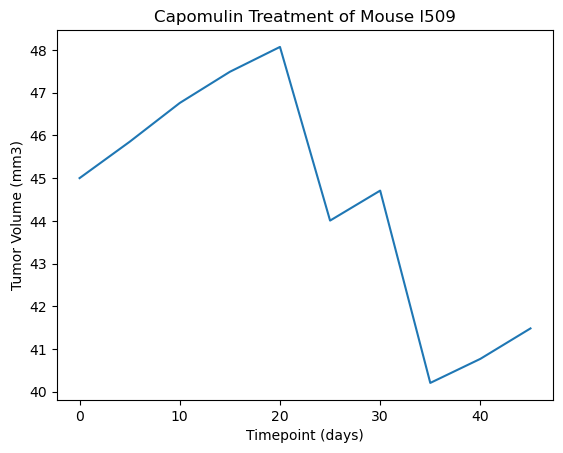

In [69]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_mouse = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
l509 = capo_mouse[capo_mouse["Mouse ID"] == "l509"]
plt.plot(l509["Timepoint"], l509["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")


Text(0.5, 1.0, 'Weight vs Average Tumor Volume in Capomullin treated mice')

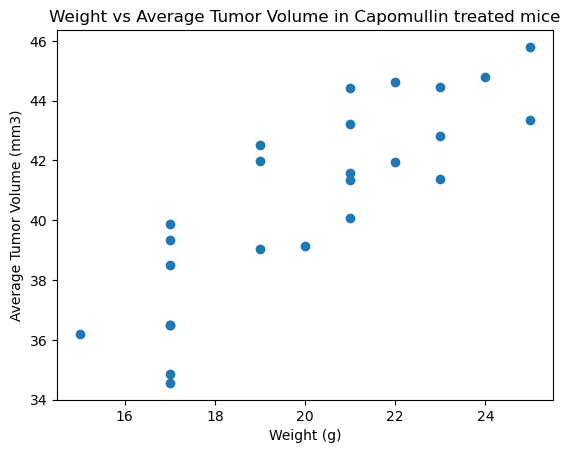

In [70]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_mice = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
avg_tumor = capo_mice.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capo_mice.groupby("Mouse ID")["Weight (g)"].unique()
plt.scatter(mouse_weight, avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Average Tumor Volume in Capomullin treated mice")

## Correlation and Regression

In [71]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Had Xpert Learning tool help, unable to solve error.
correlation = st.pearsonr(mouse_weight, avg_tumor)
print(f"The correlation between mouse weight and average tumor volume is {correlation[0]}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor)
regress_values = mouse_weight * slope + intercept

plt.scatter(mouse_weight, avg_tumor)
plt.plot(mouse_weight, regress_values, "r-")


The correlation between mouse weight and average tumor volume is [0.84116671]


AttributeError: 'float' object has no attribute 'shape'